In [1]:
from csv_analysis import BayesDB_Simulator, pred_wrapper, add_bouts_reversed_label, make_regression_plots
%matplotlib inline
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
import seaborn as sb
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
sb.set()
husl = sb.color_palette("husl",8)
cp = sb.color_palette()
#sb.palplot(husl)
#sb.set_style('ticks')
#sb.set_style('whitegrid')
sb.reset_orig()
#sb.set_style('whitegrid')
sb.set_style('white')
sb.axes_style({'ytick.right':False})
#sb.set_style("ticks", {"xtick.major.size": -1, "ytick.major.size": -1})
#sb.set_style({'xtick.minor.size': 0})
sb.set_style({"xtick.direction": "in","ytick.direction": "in", 'ytick.right':False, 'ytick.left': False})



In [2]:
fish_id = "wik_bdb"
file_id = "bdb_hunts_inverted.bdb"
file_id_raw = "bdb_hunts.bdb"
bdsim = BayesDB_Simulator(fish_id, file_id, -1)
data = pd.read_csv('wik_bdb/huntbouts_inverted.csv')
data_raw = pd.read_csv('wik_bdb/all_huntbouts_rev.csv')
bdsim_raw = BayesDB_Simulator(fish_id, file_id_raw, -1)



SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .5 AND .8 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .5 AND .8 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
19 bouts in Query 1
Mean Q1 = 1.090527944
16 bouts in Query 2
Mean Q2 = 0.547222690125
Ttest_indResult(statistic=2.1728515088984772, pvalue=0.037072923344445327)


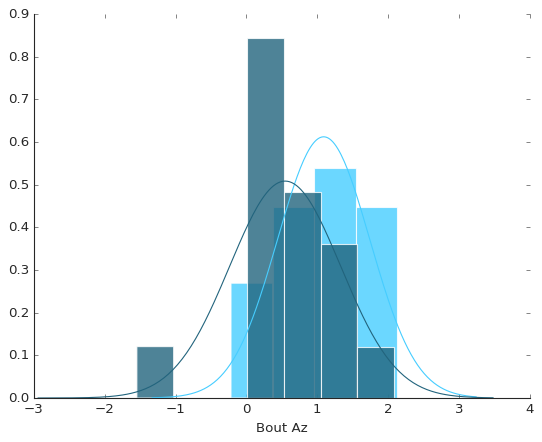

In [9]:
two_p = bdsim_raw.compare_2_queries('"Bout Az"', 
                                '"Para Az" BETWEEN .5 AND .8 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
                                '"Para Az" BETWEEN .5 AND .8 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 1, 0, husl[5])

In [4]:
two_p = bdsim_raw.compare_2_queries('"Para Az Velocity"', 
                                '"Para Az" BETWEEN -1 AND 1 AND "Para Az Velocity" > 0 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3', 
                                '"Para Az" BETWEEN -1 AND 1 AND "Para Az Velocity" < 0 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3', 1, 0)

TypeError: compare_2_queries() takes exactly 7 arguments (6 given)

SELECT "Para Alt" FROM bout_table WHERE "Para Alt" BETWEEN .8 AND 1.5 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Para Alt" FROM bout_table WHERE "Para Alt" BETWEEN .8 AND 1.5 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
13 bouts in Blue Query
Mean Blue = 0.881635716308
14 bouts in Yellow Query
Mean Yellow = 0.888217357786
Ttest_indResult(statistic=-0.23008961629225369, pvalue=0.81989444691516455)


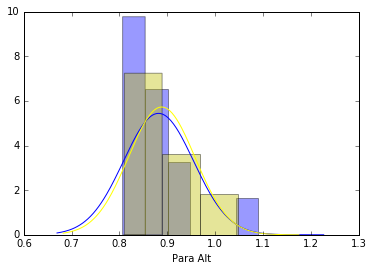

In [39]:
two_p = bdsim_raw.compare_2_queries('"Para Alt"', 
                                '"Para Alt" BETWEEN .8 AND 1.5 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
                                '"Para Alt" BETWEEN .8 AND 1.5 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 1, 0)

In [ ]:
rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" < 0) OR ("Para Az" < 0 AND "Para Az Velocity" > 0))', labels)
rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" > 0) OR ("Para Az" < 0 AND "Para Az Velocity" < 0))', labels)

SELECT "Para Az" FROM bout_table WHERE "Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3
SELECT "Para Az" FROM bout_table WHERE "Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" < 0 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3
150 bouts in Blue Query
Mean Blue = 0.425103568173
88 bouts in Yellow Query
Mean Yellow = 0.43349296608
Ttest_indResult(statistic=-0.71442859434818951, pvalue=0.4756682407905517)


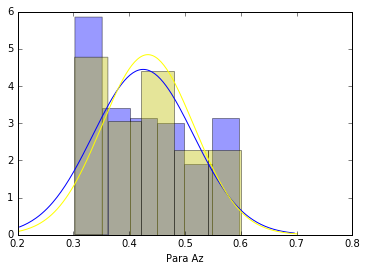

In [58]:
two_p = bdsim.compare_2_queries('"Para Az"', 
                                '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3', 
                                '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" < 0 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3', 1, 0)

SELECT "Bout Dist" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Dist" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" <  0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
135 bouts in Blue Query
Mean Blue = 39.134196717
252 bouts in Yellow Query
Mean Yellow = 46.0272462094
Ttest_indResult(statistic=-2.6439334168578106, pvalue=0.0085298844863356)


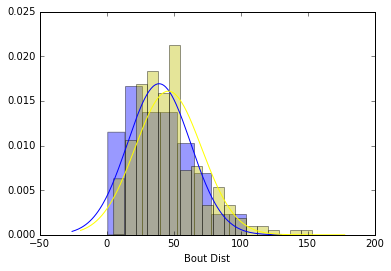

In [13]:
two_p = bdsim_raw.compare_2_queries('"Bout Dist"', 
                                '"Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
                                '"Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" <  0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 1, 0)

SELECT "Postbout Para Az" FROM bout_table WHERE "Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" >= 0 AND "Strike Or Abort" <= 2
SELECT "Postbout Para Az" FROM bout_table WHERE "Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" <  0 AND "Bout Number" >= 0 AND "Strike Or Abort" <= 2
150 bouts in Blue Query
Mean Blue = 0.19096417616
88 bouts in Yellow Query
Mean Yellow = 0.219334835318
Ttest_indResult(statistic=-0.74028108800691261, pvalue=0.45986527994398396)


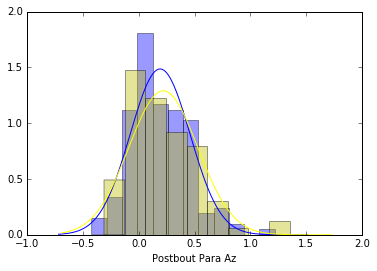

In [59]:
two_p = bdsim.compare_2_queries('"Postbout Para Az"', 
                                '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" >= 0 AND "Strike Or Abort" <= 2', 
                                '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" <  0 AND "Bout Number" >= 0 AND "Strike Or Abort" <= 2', 1, 0)

SELECT "Bout Dist" FROM bout_table WHERE "Para Az" BETWEEN .2 AND .4 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Dist" FROM bout_table WHERE "Para Az" BETWEEN .2 AND .4 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
159 bouts in Blue Query
Mean Blue = 47.6537176104
81 bouts in Yellow Query
Mean Yellow = 45.0960440912
Ttest_indResult(statistic=0.75651218371813989, pvalue=0.45009036355273813)


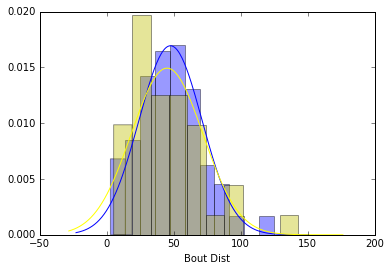

In [5]:
two_p = bdsim.compare_2_queries('"Bout Dist"', 
                                '"Para Az" BETWEEN .2 AND .4 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
                                '"Para Az" BETWEEN .2 AND .4 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 1, 0)
two_p.savefig('2vp.pdf')

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .6 AND 1 AND "Para Alt Velocity" > 0 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .6 AND 1 AND "Para Alt Velocity" <  0 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3
116 bouts in Blue Query
Mean Blue = 0.791485547474
90 bouts in Yellow Query
Mean Yellow = 0.499461209033
Ttest_indResult(statistic=4.4765707932291834, pvalue=1.2607447270865701e-05)


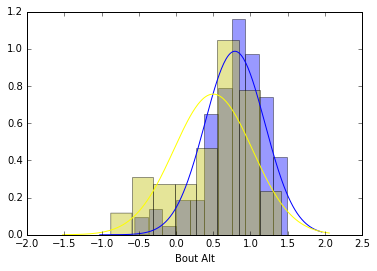

In [62]:
two_p = bdsim.compare_2_queries('"Bout Alt"', 
                                '"Para Alt" BETWEEN .6 AND 1 AND "Para Alt Velocity" > 0 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3', 
                                '"Para Alt" BETWEEN .6 AND 1 AND "Para Alt Velocity" <  0 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3', 1, 0)

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt Accel" > 0 AND "Para Alt" BETWEEN .3 AND .5 AND "Para Alt Velocity" < 0 AND "Strike Or Abort" <= 2 AND "Bout Number" >= 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt Accel" < 0 AND "Para Alt" BETWEEN .3 AND .5 AND "Para Alt Velocity" < 0 AND "Strike Or Abort" <= 2 AND "Bout Number" >= 3
86 bouts in Blue Query
Mean Blue = -0.0310637775581
79 bouts in Yellow Query
Mean Yellow = 0.0565031367848
Ttest_indResult(statistic=-1.5267814820372603, pvalue=0.12875345266545374)


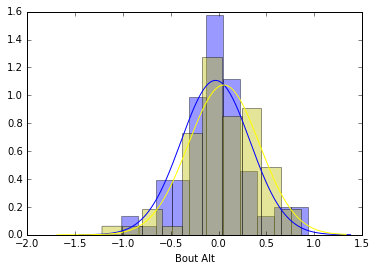

In [38]:
two_p = bdsim_raw.compare_2_queries('"Bout Alt"', 
                                '"Para Alt Accel" > 0 AND "Para Alt" BETWEEN .3 AND .5 AND "Para Alt Velocity" < 0 AND "Strike Or Abort" <= 2 AND "Bout Number" >= 3', 
                                '"Para Alt Accel" < 0 AND "Para Alt" BETWEEN .3 AND .5 AND "Para Alt Velocity" < 0 AND "Strike Or Abort" <= 2 AND "Bout Number" >= 3', 1, 0)

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .5 AND .8 AND "Para Alt Velocity" > 0  AND "Strike Or Abort" < 3 AND "Bout Number" > 0
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN .5 AND .8 AND "Para Alt Velocity" <  0  AND "Strike Or Abort" < 3 AND "Bout Number" > 0
116 bouts in Blue Query
Mean Blue = 0.132745567259
98 bouts in Yellow Query
Mean Yellow = 0.082156428051
Ttest_indResult(statistic=3.7411325451216952, pvalue=0.00023582220777601482)


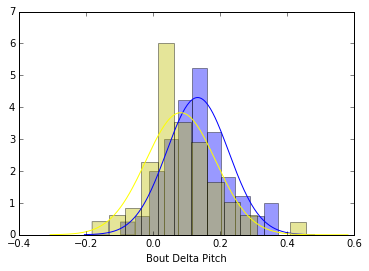

In [42]:
two_p = bdsim_raw.compare_2_queries('"Bout Delta Pitch"', 
                                '"Para Alt" BETWEEN .5 AND .8 AND "Para Alt Velocity" > 0  AND "Strike Or Abort" < 3 AND "Bout Number" > 0', 
                                '"Para Alt" BETWEEN .5 AND .8 AND "Para Alt Velocity" <  0  AND "Strike Or Abort" < 3 AND "Bout Number" > 0', 1, 0)
two_p.savefig('2vp.pdf')

SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" > 0 AND "Strike Or Abort" <= 2
SELECT "Bout Delta Pitch" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" <  0 AND "Strike Or Abort" <= 2
211 bouts in Blue Query
Mean Blue = 0.0321405057915
314 bouts in Yellow Query
Mean Yellow = -0.000872593917197
Ttest_indResult(statistic=3.0283056722299562, pvalue=0.0025806895856412947)


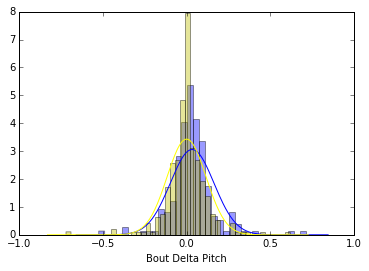

In [16]:
two_p = bdsim.compare_2_queries('"Bout Delta Pitch"', 
                                '"Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" > 0 AND "Strike Or Abort" <= 2', 
                                '"Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" <  0 AND "Strike Or Abort" <= 2',
                                1, 0)
pl.savefig('2VP.pdf')

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .6 AND "Para Az Velocity" BETWEEN .3 AND .6  AND "Para Az Accel" > 0
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .6 AND  "Para Az Velocity" BETWEEN .3 AND .6 AND "Para Az Accel" < 0
194 bouts in Blue Query
Mean Blue = 0.113402519686
215 bouts in Yellow Query
Mean Yellow = 0.0901608936233
Ttest_indResult(statistic=1.1558950506718406, pvalue=0.24840216466706896)


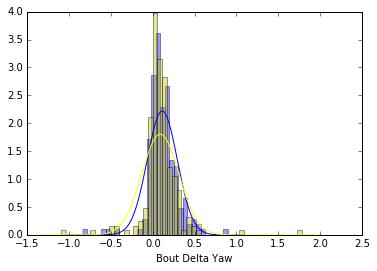

In [55]:
two_p = bdsim.compare_2_queries('"Bout Delta Yaw"', 
                                '"Para Az" BETWEEN 0 AND .6 AND "Para Az Velocity" BETWEEN .3 AND .6  AND "Para Az Accel" > 0', 
                                '"Para Az" BETWEEN 0 AND .6 AND  "Para Az Velocity" BETWEEN .3 AND .6 AND "Para Az Accel" < 0',
                                1, 0)

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN -.5 AND .15 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN -.5 AND .15 AND  "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
72 bouts in Blue Query
Mean Blue = -0.191920450972
125 bouts in Yellow Query
Mean Yellow = -0.382594864184
Ttest_indResult(statistic=2.7169108606730448, pvalue=0.0071822162938007788)


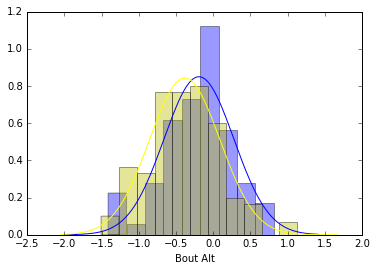

In [54]:
two_p = bdsim_raw.compare_2_queries('"Bout Alt"', 
                                    '"Para Alt" BETWEEN -.5 AND .15 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3',
                                    '"Para Alt" BETWEEN -.5 AND .15 AND  "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3',
                                1, 0)

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .5 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .5 AND  "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
321 bouts in Blue Query
Mean Blue = 0.231162939349
508 bouts in Yellow Query
Mean Yellow = -0.0671152464882
Ttest_indResult(statistic=9.5889104649306933, pvalue=1.0144312565067337e-20)


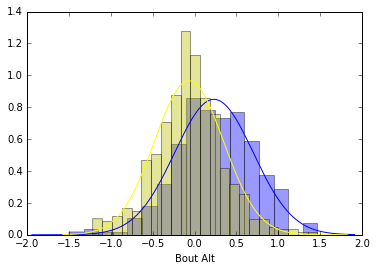

In [51]:
two_p = bdsim_raw.compare_2_queries('"Bout Alt"', 
                                    '"Para Alt" BETWEEN 0 AND .5 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3',
                                    '"Para Alt" BETWEEN 0 AND .5 AND  "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3',
                                1, 0)

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt Velocity" > 0 AND "Para Alt Accel" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt Velocity" > 0 AND "Para Alt Accel" < 0 AND "Strike Or Abort" < 3
342 bouts in Blue Query
Mean Blue = 0.367963022202
295 bouts in Yellow Query
Mean Yellow = 0.383594290695
Ttest_indResult(statistic=-0.39181974727154006, pvalue=0.69532286047273828)


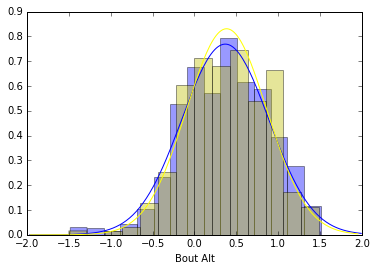

In [27]:
two_p = bdsim.compare_2_queries('"Bout Alt"', 
                                '"Para Alt Velocity" > 0 AND "Para Alt Accel" > 0 AND "Strike Or Abort" < 3', 
                                '"Para Alt Velocity" > 0 AND "Para Alt Accel" < 0 AND "Strike Or Abort" < 3',
                                1, 0)

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .1 AND "Postbout Para Az" < 0 AND "Para Az Velocity" > 0
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .1 AND "Postbout Para Az" <  0 AND "Para Az Velocity" < 0
21 bouts in Blue Query
Mean Blue = 0.123667421714
22 bouts in Yellow Query
Mean Yellow = 0.0351933285455
Ttest_indResult(statistic=2.7498235451469513, pvalue=0.0088308114950980416)


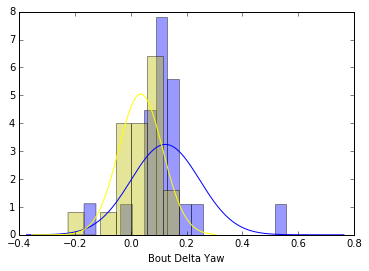

In [4]:
two_p = bdsim.compare_2_queries('"Bout Delta Yaw"', '"Para Az" BETWEEN 0 AND .1 AND "Postbout Para Az" < 0 AND "Para Az Velocity" > 0', '"Para Az" BETWEEN 0 AND .1 AND "Postbout Para Az" <  0 AND "Para Az Velocity" < 0', 1, 0)

### REGRESSION FOR INVERTED DATA

In [8]:
query_exp = '"Para Dist","Bout Dist"'
#rp = bdsim.two_variable_regression(query_exp, '"Para Az" BETWEEN 0 and .2 AND "Bout Number" >= 0 AND "Strike Or Abort" <= 2')
rp = bdsim.two_variable_regression(query_exp, '"Bout Number" >= 0 AND "Strike Or Abort" <= 3')
#rp = bdsim.two_variable_regression(query_exp, '')
rp[0].savefig('regplot.pdf')

TypeError: two_variable_regression() takes at least 4 arguments (3 given)

SELECT "Para Alt","Postbout Para Alt" FROM bout_table WHERE "Bout Number" == 0 AND "Strike Or Abort" < 3
236 Bouts


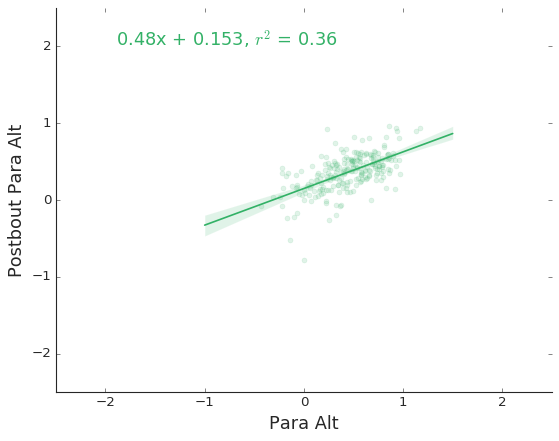

In [5]:
labels = ("Para Alt", "Postbout Para Alt")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" == 0 AND "Strike Or Abort" < 3', husl[3], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt" < 0', husl[3], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt" < 0 AND "Para Alt Velocity" > 0')
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3', husl[3], labels)
#rp = bdsim.two_variable_regression(query_exp, '"Para Az" BETWEEN 0 and .3 AND "Bout Number" >= 0 AND "Strike Or Abort" <= 2')
#rp = bdsim.two_variable_regression(query_exp, '"Para Az" BETWEEN 0 AND .3 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3 AND "Para Az Velocity" < 0')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" < 0) OR ("Para Az" < 0 AND "Para Az Velocity" > 0))')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" == 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" > 0) OR ("Para Az" < 0 AND "Para Az Velocity" < 0))')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" < 0) OR ("Para Az" < 0 AND "Para Az Velocity" > 0))', labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" > 0) OR ("Para Az" < 0 AND "Para Az Velocity" < 0))', labels)
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Az" > 0 AND "Para Az Velocity" > 0')
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Az" < 0 AND "Para Az Velocity" < 0')
#rp = bdsim.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Az Velocity" > 0')
#rp2 = bdsim.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Az Velocity" < 0')
rp[0].savefig('regplot.pdf')
#rp2[0].savefig('regplot2.pdf')
pl.show()
#mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, [husl[3], husl[4]],)
#mrp.savefig('mrp_az.pdf')

### REGRESSION FOR RAW DATA

SELECT "Para Dist","Bout Dist" FROM bout_table WHERE "Bout Number" > 0 AND "Strike Or Abort" <= 2
1164 Bouts


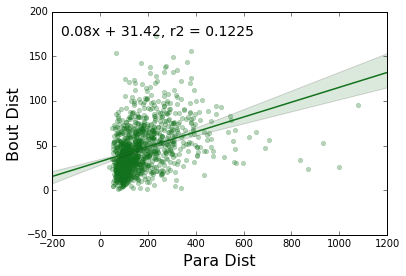

In [11]:
labels = ("Para Dist", "Bout Dist")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
#rp = bdsim_raw.two_variable_regression(query_exp, '"Para Az" BETWEEN 0 and .1')
rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" <= 2', labels)
#rp = bdsim_raw.two_variable_regression(query_exp, '')
rp[0].savefig('regplot.pdf')

In [116]:
# ALWAYS USE INVERTED DATA HERE!
spacing = .3
p_angle_bounds = [[i, i+spacing] for i in np.arange(0,1,spacing)]
norm_az = 0
norm_alt = 0
p_angle_bounds_invert = [[-a[1], -a[0]] for a in p_angle_bounds]
print p_angle_bounds_invert
vels = [-5, -.01]
vels = [.01, 5]
use_abs_val = 0
distance_limit = [0, 1000]
#p_angle_bounds = [[0, 1]]
#distance_limit = [0, 200]
actions = [1,2]
#skip_bout_numbers = ['reverse', range(-50, -3) + [-1]]
#skip_bout_numbers = ['forward', range(1, 50) + [-1]]
skip_bout_numbers = ['forward', [-1,0]]

[[-0.29999999999999999, -0.0], [-0.59999999999999998, -0.29999999999999999], [-0.89999999999999991, -0.59999999999999998], [-1.2, -0.89999999999999991]]


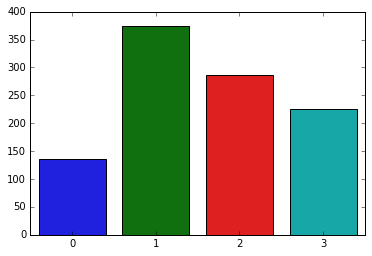

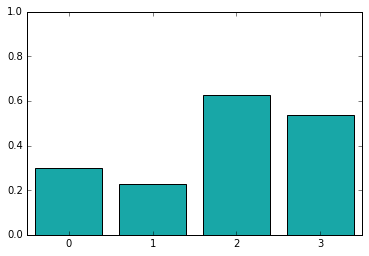

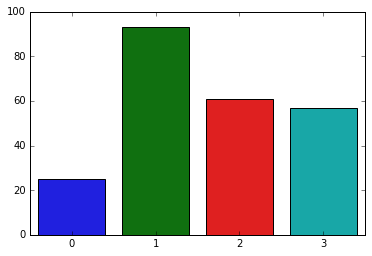

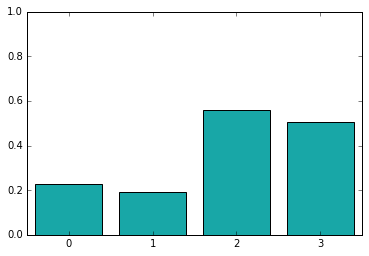

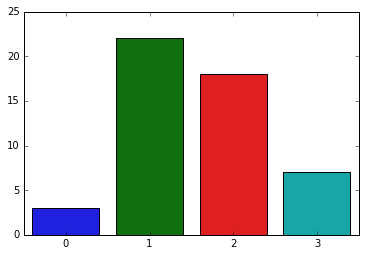

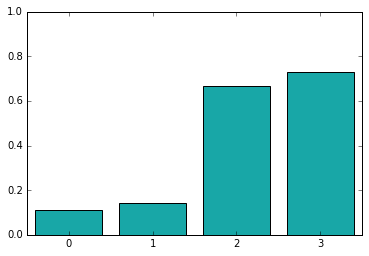

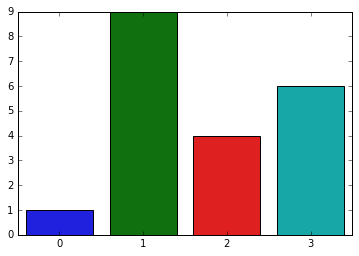

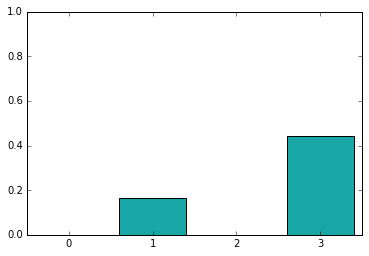

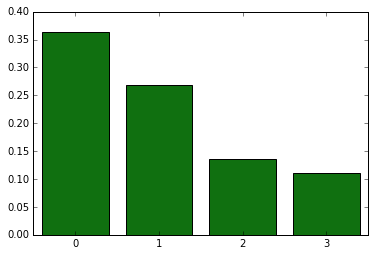

TOTAL BOUTS
[511, 118, 25, 10]


In [117]:
tb, bout_assignment = pred_wrapper(data, p_angle_bounds, 
                                   skip_bout_numbers, actions, distance_limit, use_abs_val, vels, 
                                   norm_az, norm_alt, 'az')

IndexError: list index out of range

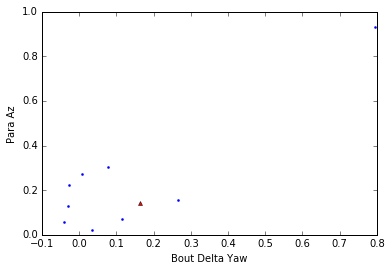

In [118]:
varb = "Bout Delta Yaw"
varb_predict_overshoot = []
varb_predict_undershoot = []

p_angle_bounds = p_angle_bounds[0]
plot_varb1 = "Bout Delta Yaw"
plot_varb2 = "Para Az"

# a bout assignment of 1 is an undershooting lag.
# bout assignment of 2 is an overshooting lag
# bout assignment of 3 is an undershooting lead.
# bout assignment of 4 is an overshooting lead

# dots are lags, triangles are leads
# blue is undershoot, red is overshoot

for ind, p_az in enumerate(data["Para Az"]):
        marker_size = 4
        if bout_assignment[ind] == 0:
            continue
        if bout_assignment[ind] == 1:
            marker_type = '.'
            p_color = 'b'
        if bout_assignment[ind] == 2:
            marker_type = '.'
            p_color = 'r'
        if bout_assignment[ind] == 3:
            marker_type = '^'
            p_color = 'b'
            varb_predict_undershoot.append(data[varb][ind])
        if bout_assignment[ind] == 4:
            marker_type = '^'
            p_color = 'r'
            varb_predict_overshoot.append(data[varb][ind])
        pl.plot(data[plot_varb1][ind], data[plot_varb2][ind], color=p_color,
            marker=marker_type, ms=marker_size, linestyle='None')
        pl.xlabel(plot_varb1)
        pl.ylabel(plot_varb2)
pl.savefig('circle_triangle_plot.pdf')
pl.figure()
sb.distplot(varb_predict_overshoot, fit_kws={"color":"blue"}, fit=norm, kde=False,color='b')
sb.distplot(varb_predict_undershoot, fit_kws={"color":"yellow"}, fit=norm, kde=False,color='y')


pl.savefig('prediction_tally.pdf')

# RED CIRCLES ARE A FAIL TO LEAD WHEN PARA IS GOING RIGHT
# BLUE CIRCLES ARE A FAIL TO LEAD WHEN PARA IS GOING LEFT
# RED SQUARES ARE A SUCCESSFUL LEAD WHEN PARA IS GOING RIGHT
# BLUE TRIANGLES ARE SUCCESSFUL LEADS WHEN PARA IS GOING LEFT
# RED CIRCLES ACCOUNT FOR NOT SEEING A CHANGE IN BOUT AZ AND YAW IN THIS WINDOW! 

In [16]:
from collections import Counter
Counter(bout_assignment)


Counter({0: 305, 1: 56, 2: 17, 3: 35, 4: 29})

SELECT "Para Az Velocity" FROM bout_table WHERE "Bout Number" > 0 AND "Strike Or Abort" <= 2
1119 total bouts
0.174555675099
0.75160386606


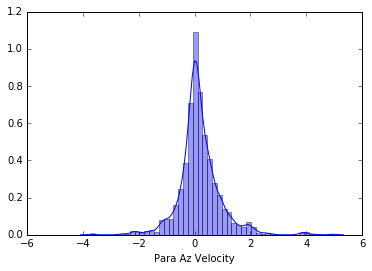

In [111]:
d = bdsim.single_hist('"Para Az Velocity"', '"Bout Number" > 0 AND "Strike Or Abort" <= 2')

SELECT "Para Alt Velocity" FROM bout_table WHERE "Bout Number" > -1 AND "Strike Or Abort" <= 2
1409 total bouts
-0.160668684856
0.649888485542


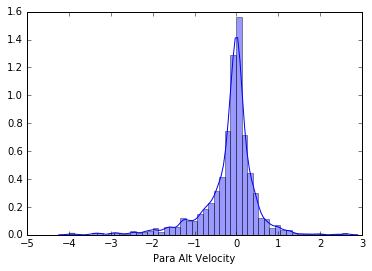

In [9]:
p = bdsim_raw.single_hist('"Para Alt Velocity"', '"Bout Number" > -1 AND "Strike Or Abort" <= 2')

In [21]:
print(bout_assignment)

[0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]


In [22]:
len(bout_assignment)

54

In [ ]:
len(data["Para Az"])

In [ ]:
pred_velocities = []
for loc, i in enumerate(bout_assignment):
    if i != 0:
        pred_velocities.append(data["Para Az Velocity"][loc])
pl.hist(3*np.degrees(pred_velocities), bins=20)

        
        

#         print('Pred Bout Assignment: ' + str(bout_assignment[loc]))
#         a = raw_input('')

In [ ]:
print np.degrees(np.mean(np.abs(data["Para Az Velocity"])))
#print np.degrees(np.mean(np.abs(nac_data["Para Az Velocity"])))

In [4]:
data_raw = pd.read_csv('wik_bdb/all_huntbouts_w_nans.csv')
len(data_raw["Bout Number"])
add_bouts_reversed_label(data_raw)

(4056,)
(4056,)


[-6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -2,
 -1,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -5,
 -4,
 -3,
 -2,
 -1,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -3,
 -2,
 -1,
 -2,
 -1,
 -3,
 -2,
 -1,
 -2,
 -1,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.